In [1]:
cd downloads

C:\Users\Rajesh\downloads


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rajesh\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train=pd.read_csv('Train (1).csv')

In [4]:
test=pd.read_csv('Test (1).csv')

In [5]:
train.head()

,id,content,category
0,SW0,SERIKALI imesema haitakuwa tayari kuona amani...,Kitaifa
1,SW1,"Mkuu wa Mkoa wa Tabora, Aggrey Mwanri amesiti...",Biashara
2,SW10,SERIKALI imetoa miezi sita kwa taasisi zote z...,Kitaifa
3,SW100,KAMPUNI ya mchezo wa kubahatisha ya M-bet ime...,michezo
4,SW1000,WATANZANIA wamekumbushwa kusherehekea sikukuu...,Kitaifa


In [9]:
train.shape

(5151, 3)

In [10]:
test.shape

(1288, 2)

In [6]:
train.drop('id',1,inplace=True)

In [7]:
test_id=test['swahili_id']

In [8]:
test.drop('swahili_id',1,inplace=True)

In [9]:
combi=train.append(test,ignore_index=True)

C:\Users\Rajesh\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
tt=combi['content'].apply(lambda x:x.split())

In [11]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tt1 = tt.apply(lambda x: [stemmer.stem(i) for i in x])

In [12]:
for i in range(len(tt1)):
    tt1[i] = ' '.join(tt1[i])    
combi['tidy_tweet'] = tt1

In [22]:
stop_swahili=["akasema","alikuwa","alisema","baada","basi","bila","cha","chini","hadi","hapo","hata","hivyo","hiyo","huku","huo","ili","ilikuwa","juu","kama","karibu","katika","kila","kima","kisha","kubwa","kutoka","kuwa","kwa","kwamba","kwenda","kwenye","la","lakini","mara","mdogo","mimi","mkubwa","mmoja","moja","muda","mwenye","na","naye","ndani","ng","ni","nini","nonkungu","pamoja","pia","sana","sasa","sauti","tafadhali","tena","tu","vile","wa","wakati","wake","walikuwa","wao","watu","wengine","wote","ya","yake","yangu","yao","yeye","yule","za","zaidi","zake"]


In [14]:
from nltk.tokenize import word_tokenize 
words=[]
for i in combi['tidy_tweet']:
    words.append(word_tokenize(i))
    

In [15]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 

In [16]:
filter_sentence=[]

for w in words:
    l=[]
    for i in w:
        if i not in stop_swahili:
            l.append(i)
    filter_sentence.append(' '.join(l))

In [17]:
combi['tidy']=filter_sentence

In [18]:
combi.drop('tidy_tweet',axis=1,inplace=True)

In [32]:
from wordcloud import WordCloud

In [34]:
sports=' '.join([text for text in combi['tidy'][combi['category']=='michezo']])

In [38]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(sports)

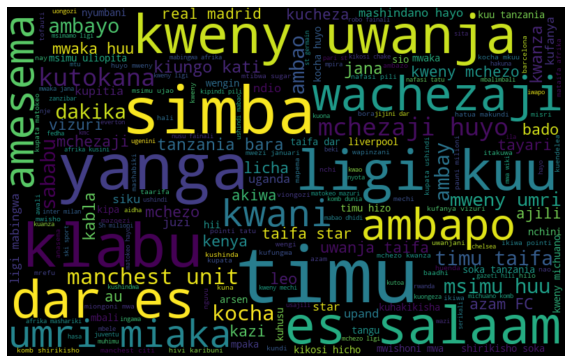

In [41]:

plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()


In [45]:
national=' '.join([text for text in combi['tidy'][combi['category']=='Kitaifa']])

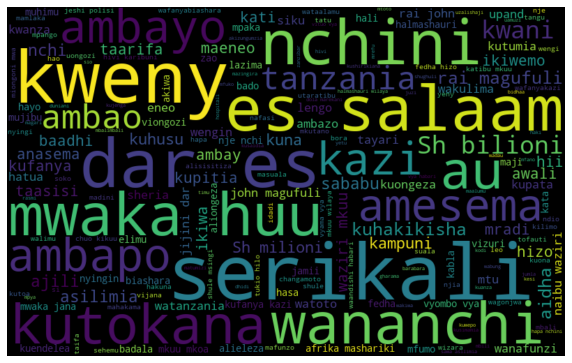

In [47]:
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(national)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim


In [20]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2,max_features=1000, stop_words='english') 
bow = bow_vectorizer.fit_transform(combi['tidy']) 
bow.shape

(6439, 1000)

In [23]:
tdf_vectorize=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000)
tfidf = tdf_vectorize.fit_transform(combi['tidy'])
tfidf.shape

(6439, 1000)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [25]:
combi['content']=combi['tidy']

In [26]:
combi.drop('tidy',1,inplace=True)

In [24]:
train_bow=bow[:5151,:]
test_bow=bow[5151:,:]

In [27]:
train_tdf=tfidf[:5151,:]
test_tdf=tfidf[5151:,:]

In [45]:
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(x_train_tdm,y_train[0],random_state=42,test_size=0.3)

In [31]:
xtrain_tdf, xvalid_tdf, ytrain, yvalid = train_test_split(train_tdf, train['category'],random_state=42,test_size=0.3)

In [28]:
dic={'Kitaifa':0,'Biashara':1,'michezo':2,'Kimataifa':3,'Burudani':4}

In [29]:
l=[]
for i in train['category']:
    l.append(dic[i])

In [30]:
train['category']=l

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(xtrain_bow,ytrain)
rf_pred=rf.predict(xvalid_bow)

C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(xtrain_tdf,ytrain)
rf_pred=rf.predict(xvalid_tdf)

NameError: name 'xtrain_tdf' is not defined

In [48]:
accuracy_score(yvalid,rf_pred)

0.7943078913324709

In [42]:
pred=rf.predict(test_bow)

In [44]:
ss=pd.read_csv('SampleSubmission (1).csv')

In [94]:
ss['content']=pbest_preds

In [95]:
l=[]
#dic={'Kitaifa':0,'Biashara':1,'michezo':2,'Kimataifa':3,'Burudani':4}
for i in ss['content']:
    if i==0:
        l.append('Kitaifa')
    elif i==1:
        l.append('Biashara')
    elif i==2:
        l.append('michezo')
    elif i==3:
        l.append('Kimataifa')
    elif i==4:
        l.append('Burudani')
    

In [96]:
kita=[]
for i in ss['content']:
    if i==0:
        kita.append(1)
    else:
        kita.append(0)


In [97]:
ss['kitaifa']=kita

In [105]:
ss['michezo']=mich

In [56]:
ss.head()

,swahili_id,kitaifa,michezo,biashara,kimataifa,burudani,content
0,001dd47ac202d9db6624a5ff734a5e7dddafeaf2,1,0,0,0,0,0
1,0043d97f7690e9bc02f0ed8bb2b260d1d44bad92,0,0,0,0,0,2
2,00579c2307b5c11003d21c40c3ecff5e922c3fd8,0,0,0,0,0,1
3,00868eeee349e286303706ef0ffd851f39708d37,1,0,0,0,0,0
4,00a5cb12d3058dcf2e42f277eee599992db32412,1,0,0,0,0,0


In [106]:
ss['biashara']=bia

In [100]:
mich=[]
for i in ss['content']:
    if i==2:
        mich.append(1)
    else:
        mich.append(0)

In [107]:
ss['burudani']=bu

In [108]:
ss['kimataifa']=kim

In [101]:
bia=[]
for i in ss['content']:
    if i==1:
        bia.append(1)
    else:
        bia.append(0)

In [102]:
kim=[]
for i in ss['content']:
    if i==3:
        kim.append(1)
    else:
        kim.append(0)

In [103]:
bu=[]
for i in ss['content']:
    if i==4:
        bu.append(1)
    else:
        bu.append(0)

In [104]:
ss.drop('content',1,inplace=True)

In [71]:
len(train[train['category']==4])

17

In [109]:
ss.to_csv('s.csv',index=False)

In [34]:
import xgboost as xgb
D_train = xgb.DMatrix(xtrain_tdf, label=ytrain)
D_test = xgb.DMatrix(xvalid_tdf, label=yvalid)
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 5} 

steps = 20
model = xgb.train(param, D_train, steps)

In [35]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

from sklearn.metrics import precision_score, recall_score
print("Precision = {}".format(precision_score(yvalid, best_preds, average='macro')))
print("Recall = {}".format(recall_score(yvalid, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(yvalid, best_preds)))

Precision = 0.49827585799516
Recall = 0.49261481553009556
Accuracy = 0.8240620957309185


C:\Users\Rajesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [82]:
Dt = xgb.DMatrix(test_bow)
p=model.predict(Dt)

In [84]:
pbest_preds = np.asarray([np.argmax(line) for line in p])

In [39]:
import xgboost
xg=xgboost.XGBRegressor()
gb=xg.fit(xtrain_tdf,ytrain)

In [40]:
pre=gb.predict(xvalid_tdf)

In [42]:
from sklearn.metrics import log_loss

In [50]:
kitaifa=[]
for i in combi['category']:
    if i=='Kitaifa':
        kitaifa.append(1)
    else:
        kitaifa.append(0)
combi['kitaifa']=kitaifa

In [52]:
train_kita=pd.DataFrame({'content':combi['content'],'kitaifa':combi['kitaifa']})

In [54]:
tdf_vectorize=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1500)
tfidf = tdf_vectorize.fit_transform(train_kita['content'])
tfidf.shape

(6439, 1500)

In [55]:
tkita=tfidf[:5151,:]
tkita_test=tfidf[5151:,:]

In [13]:
data=pd.concat([train,test],sort=False).reset_index(drop=True)

In [9]:
test['id']=test['swahili_id']

In [11]:
test.drop('swahili_id',1,inplace=True)

In [15]:
temp=train.groupby('category').count()['content'].reset_index().sort_values(by='content')

In [18]:
temp.style.background_gradient(cmap='Blues')

,category,content
1,Burudani,17
2,Kimataifa,54
0,Biashara,1360
4,michezo,1720
3,Kitaifa,2000


In [19]:
import string
import re

In [20]:
def clean_text(text):
    text=re.sub(r'[^a-zA-Z]',' ',text)
    text=re.sub(r'[^\x00-\x7F]+','',text)
    text=text.lower()
    return text
data['text']=data['content'].apply(lambda x:clean_text(x))

In [23]:
from nltk.tokenize import word_tokenize 
words=[]
for i in data['text']:
    words.append(word_tokenize(i))
    

In [24]:
filter_sentence=[]

for w in words:
    l=[]
    for i in w:
        if i not in stop_swahili:
            l.append(i)
    filter_sentence.append(' '.join(l))

In [26]:
data['text']=filter_sentence

In [28]:
train=data[data.category.notnull()].reset_index(drop=True)
test=data[data.category.isna()].reset_index(drop=True)

In [30]:
train =train[['id', 'text', 'category']]
test =test[['id','text']]

In [36]:
from sklearn.svm import SVC
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.model_selection import *

In [38]:
cv=CountVectorizer()
x_train_tdm=cv.fit_transform(train['text'])
#pd.DataFrame(x_train_tdm.toarray(),columns=cv.get_feature_names())

In [39]:
X_test_dtm=cv.transform(test['text'])

In [40]:
y_train=train['category'].factorize()

In [43]:
import xgboost as xgb
model1=xgb.XGBClassifier()